In [1]:
#DATA imported from google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  1. Import and Install Dependencies

In [2]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

In [ ]:
!unzip "/content/drive/MyDrive/sign_data.zip"

In [4]:
data = pathlib.Path('/content/data')


In [5]:
image_count = len(list(data.glob('*/*.jpg')))
print(image_count)

42000


In [6]:
batch_size = 32
img_height = 90
img_width = 90

# 2. Train Validation Split

In [9]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="training",
  seed=7,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42000 files belonging to 35 classes.
Using 33600 files for training.


In [10]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data,
  validation_split=0.2,
  subset="validation",
  seed=7,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 42000 files belonging to 35 classes.
Using 8400 files for validation.


In [11]:
class_names = train_data.class_names
print(class_names)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# 3. Plotting the sample images

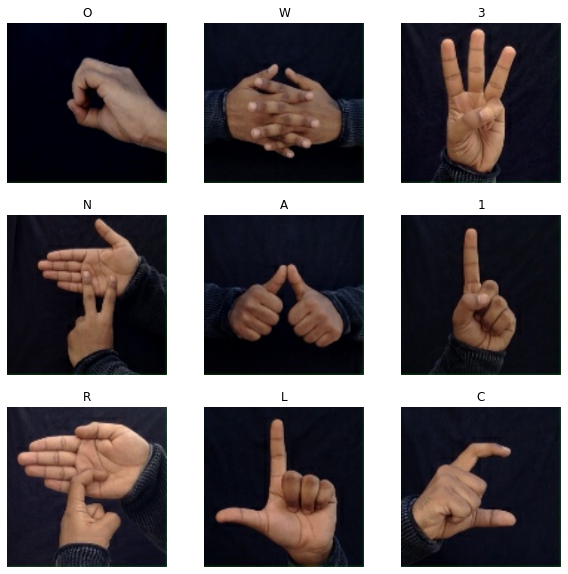

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 90, 90, 3)
(32,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# 4. Simple CNN Model Training

In [14]:
num_classes = 35
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model.fit(train_data,validation_data=val_data,epochs=1)

1050/1050 [==============================] - 66s 32ms/step - loss: 0.0706 - accuracy: 0.9827 - val_loss: 1.2342e-05 - val_accuracy: 1.0000


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 90, 90, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 88, 88, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0

# 5. Saving the model

In [18]:
model.save('CNN_Sign.h5')

In [ ]:
model.load_weights('CNN_Sign.h5')